<a href="https://colab.research.google.com/github/marwan-hamzawy/DefaultDetect-StatInfer/blob/main/DefaultDetect_StatInfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import basic libraries
import numpy as np
import pandas as pd
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

# # Step 1: Read the Excel file, skipping the extra header row
# df = pd.read_excel('/content/drive/MyDrive/Dataset/default of credit card clients.xls', header=1)

# # Step 2: Save it to CSV
# df.to_csv('/content/drive/MyDrive/Dataset/final_credit_card_default.csv', index=False)

# Step 3: Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Dataset/final_credit_card_default.csv')
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Getting Meta Data Information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
# Checking for Null Values
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


# Data Preprocessing

### Showing the unique values

In [ ]:
print(sorted(map(int, df['SEX'].unique())))


[1, 2]


In [ ]:
print(sorted(map(int, df['EDUCATION'].unique())))

[0, 1, 2, 3, 4, 5, 6]


In [ ]:
print(sorted(map(int, df['MARRIAGE'].unique())))

[0, 1, 2, 3]


In [ ]:
print(sorted(map(int, df['PAY_0'].unique())))

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
print(sorted(map(int, df['default payment next month'].unique())))

[0, 1]


### Grouping the unnecessary values

In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) \
       | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

In [ ]:
print(sorted(map(int, df['EDUCATION'].unique())))

[1, 2, 3, 4]


In [ ]:
fill = (df.MARRIAGE == 0)
df.loc[fill, 'MARRIAGE'] = 2
print(sorted(map(int, df['MARRIAGE'].unique())))

[1, 2, 3]


In [ ]:
# Map values to readable labels

# SEX: 1 = male, 2 = female
df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})

# EDUCATION: map numerical levels to labels
education_map = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
}
df['EDUCATION'] = df['EDUCATION'].map(education_map)

# MARRIAGE: map numerical codes to labels
marriage_map = {
    1: 'Married',
    2: 'Single',
    3: 'Divorced'
}
df['MARRIAGE'] = df['MARRIAGE'].map(marriage_map)


In [ ]:
df = df.rename(columns={'default payment next month': 'DEFAULT', \
                        'PAY_0': 'PAY_1'})
# df.head()
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,Male,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,Male,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,Male,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
print(df['SEX'].unique())


['Female' 'Male']


In [ ]:
print(df['MARRIAGE'].unique())


['Married' 'Single' 'Divorced']


In [ ]:
print(df['EDUCATION'].isnull().sum())


0


In [ ]:
print(df['SEX'].isnull().sum())


0


# EDA

### Univariate Analysis

<ipython-input-20-0a82c48d39e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DEFAULT", data=df, palette="Set2")


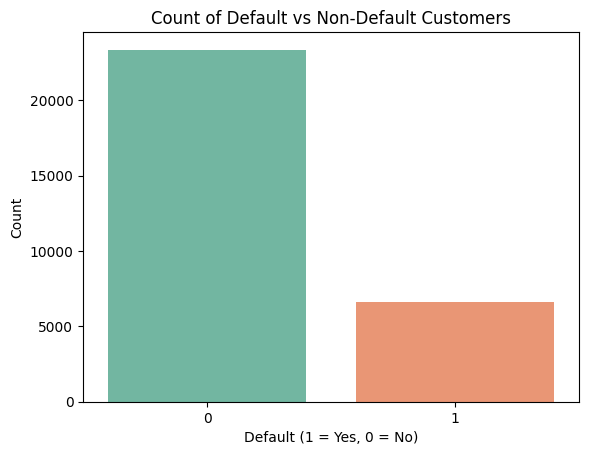

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color mapping
sns.countplot(x="DEFAULT", data=df, palette="Set2")

plt.title("Count of Default vs Non-Default Customers")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


In [ ]:
df['DEFAULT'].value_counts()

,count
DEFAULT,
0,23364
1,6636


<ipython-input-22-c380138a9aea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="SEX", data=df, palette="Set2")


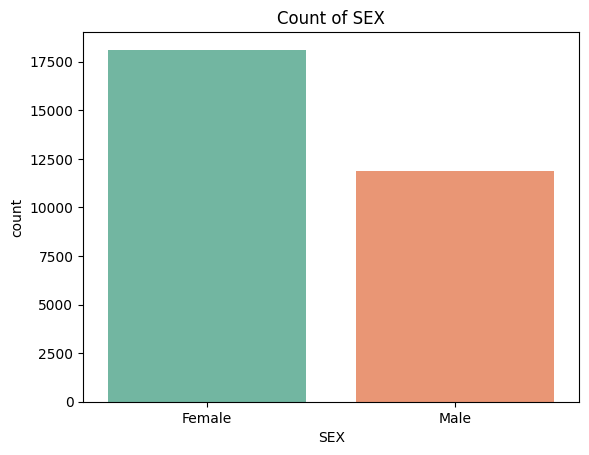

In [ ]:
sns.countplot(x="SEX", data=df, palette="Set2")
plt.title("Count of SEX")

plt.show()

<ipython-input-23-a7727cc59bb3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="EDUCATION", data=df, palette="Set2")


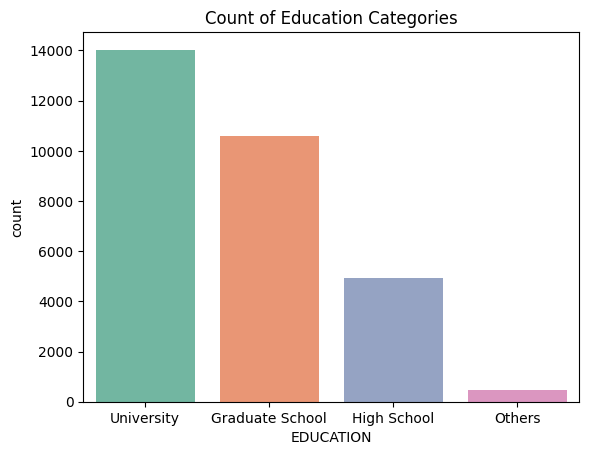

In [ ]:
sns.countplot(x="EDUCATION", data=df, palette="Set2")
plt.title("Count of Education Categories")

plt.show()

In [ ]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
University,14030
Graduate School,10585
High School,4917
Others,468


<ipython-input-25-9b59d5914d72>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="MARRIAGE", data=df, palette="Set2")


<Axes: xlabel='MARRIAGE', ylabel='count'>

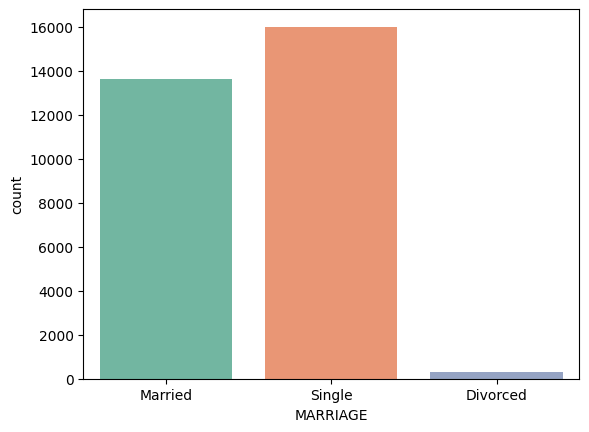

In [ ]:
sns.countplot(x="MARRIAGE", data=df, palette="Set2")


In [ ]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
Single,16018
Married,13659
Divorced,323


### Bivariate Analysis

<ipython-input-27-8c63ec8d19a0>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  edu.set_xticklabels(['Male','Female'])


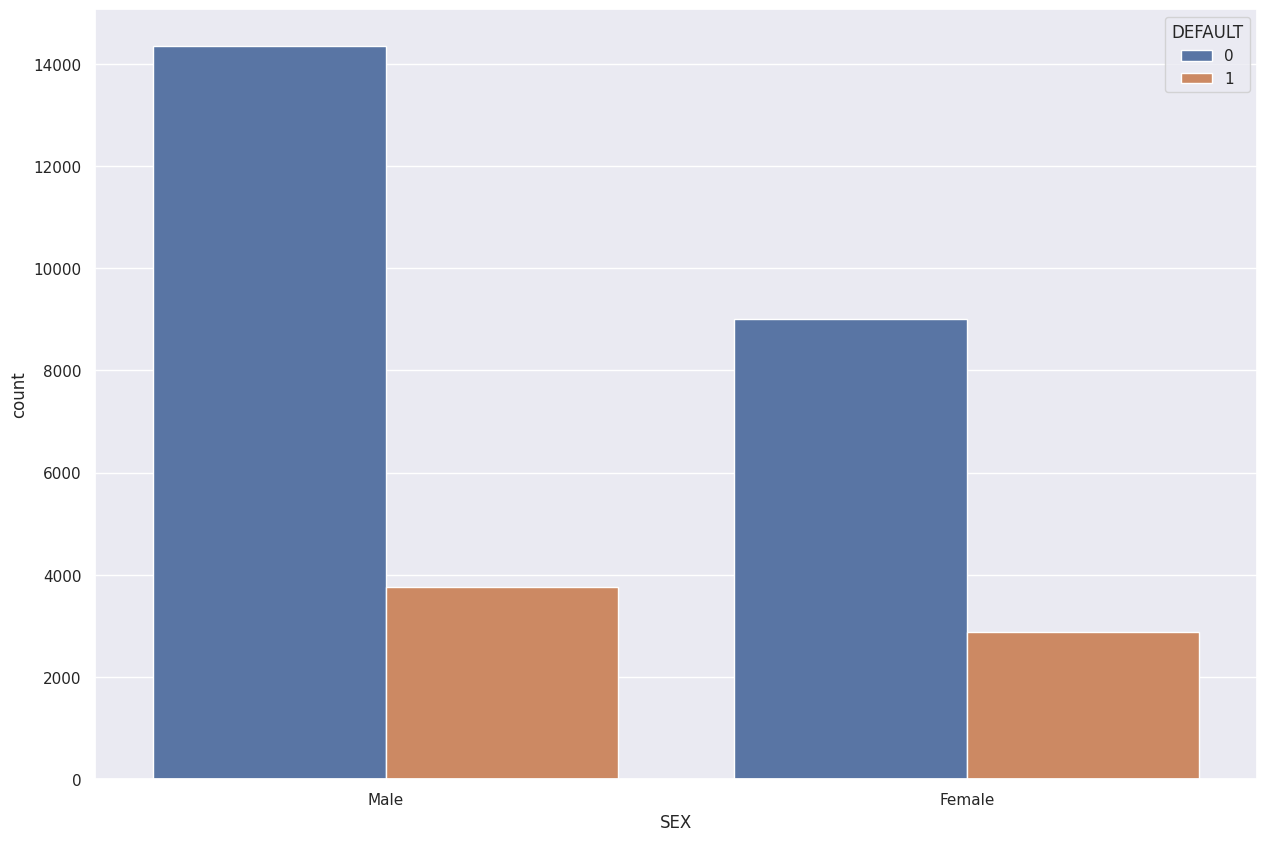

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.countplot(x='SEX', hue='DEFAULT', data=df)
edu.set_xticklabels(['Male','Female'])
plt.show()

In [ ]:
pd.crosstab(df.SEX,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
SEX,,
Female,0.792237,0.207763
Male,0.758328,0.241672
All,0.778800,0.221200


We can see, around 24% of male customers have defaulted and around **20%** of
female customers have defaulted.

<ipython-input-29-7068ee9c7948>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  edu.set_xticklabels(['Graduate School','University',\


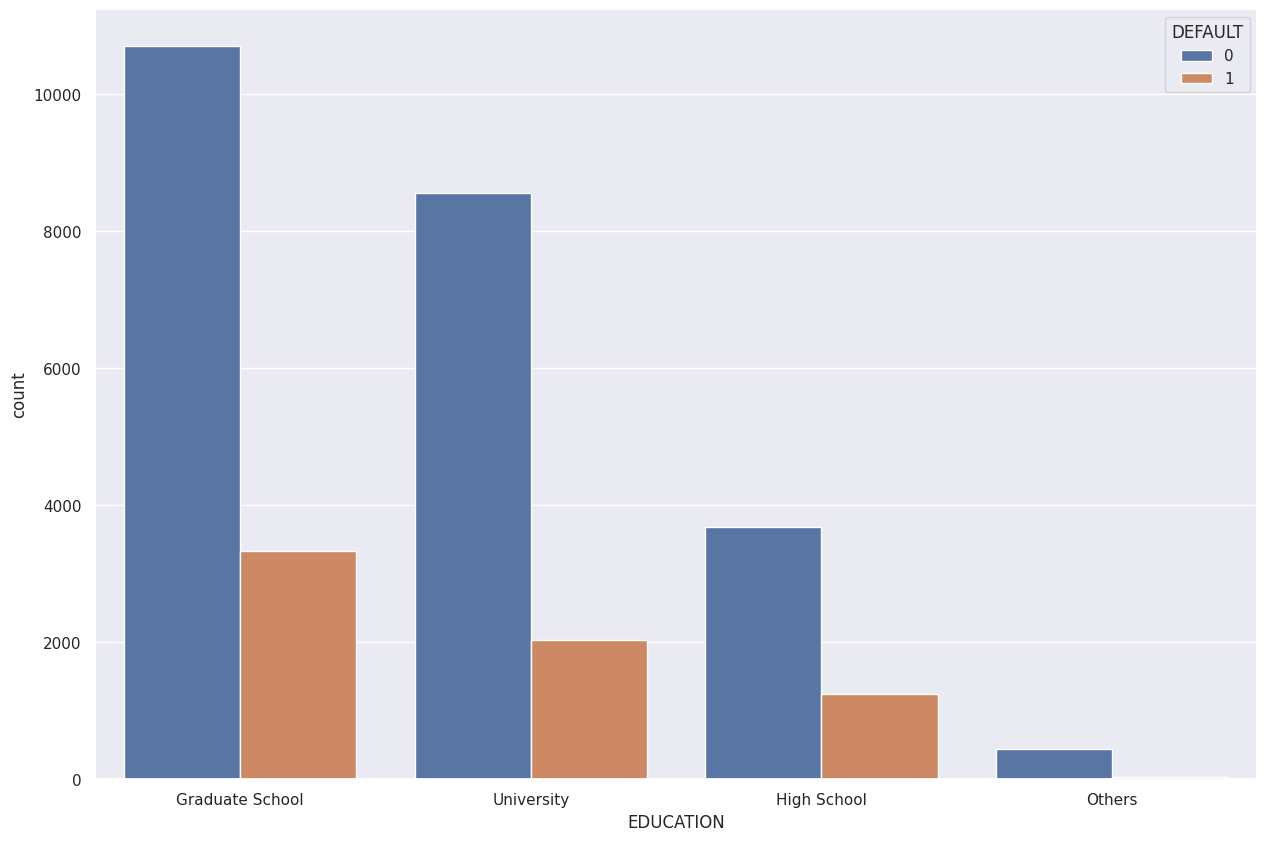

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)
edu.set_xticklabels(['Graduate School','University',\
                     'High School','Others'])
plt.show()

In [ ]:
pd.crosstab(df.EDUCATION,df.DEFAULT).sort_values(by=1,ascending=False)

DEFAULT,0,1
EDUCATION,,
University,10700,3330
Graduate School,8549,2036
High School,3680,1237
Others,435,33


In [ ]:
pd.crosstab(df.EDUCATION,df.DEFAULT,normalize='index').sort_values(by=1,ascending=False)

DEFAULT,0,1
EDUCATION,,
High School,0.748424,0.251576
University,0.762651,0.237349
Graduate School,0.807652,0.192348
Others,0.929487,0.070513


<ipython-input-31-7ffa0c12ea81>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  marriage.set_xticklabels(['Married','Single','Other'])


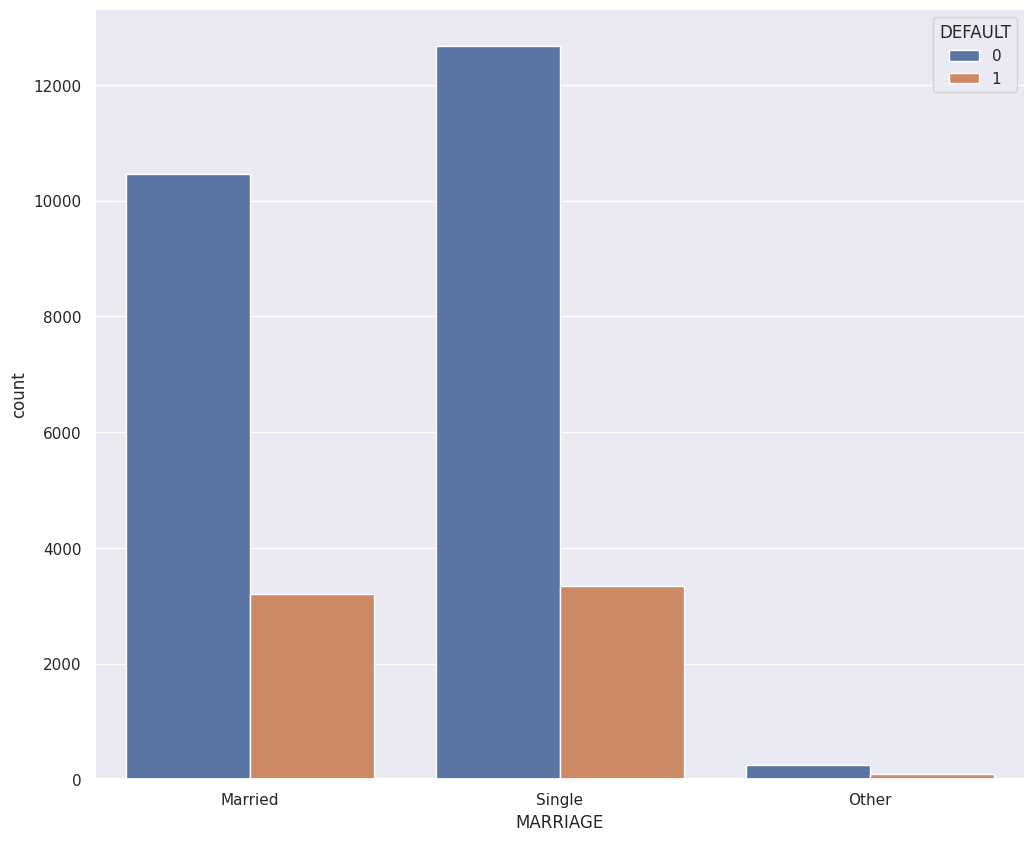

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
marriage = sns.countplot(x="MARRIAGE", hue='DEFAULT', data=df)
marriage.set_xticklabels(['Married','Single','Other'])
plt.show()

In [ ]:
pd.crosstab(df.MARRIAGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
MARRIAGE,,
Divorced,0.739938,0.260062
Married,0.765283,0.234717
Single,0.791110,0.208890
All,0.778800,0.221200


In [ ]:
pd.crosstab(df.PAY_1,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


from the output of the crosstab function, we can see that the maximum count of
defaults falls under subcategory 2—that is, a payment delay for the last 2 months.
This implies that a customer who has missed payments for 2 continuous months has
a high probability of default

In [ ]:
pd.crosstab(df.AGE,df.DEFAULT)

DEFAULT,0,1
AGE,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


In [ ]:
pd.crosstab(df.AGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


This can be answered in two ways:
1.   Counts: Who actually defaulted the most?
2.   Rates/Percentages: Who is more likely to default?

* So we can use **counts** to answer:

  > *"Which ages contribute most to total defaults?"*

* so we can use **percentages** to answer:

  > *"Which ages are most likely to default?"*

**Combining both gives the full picture**.







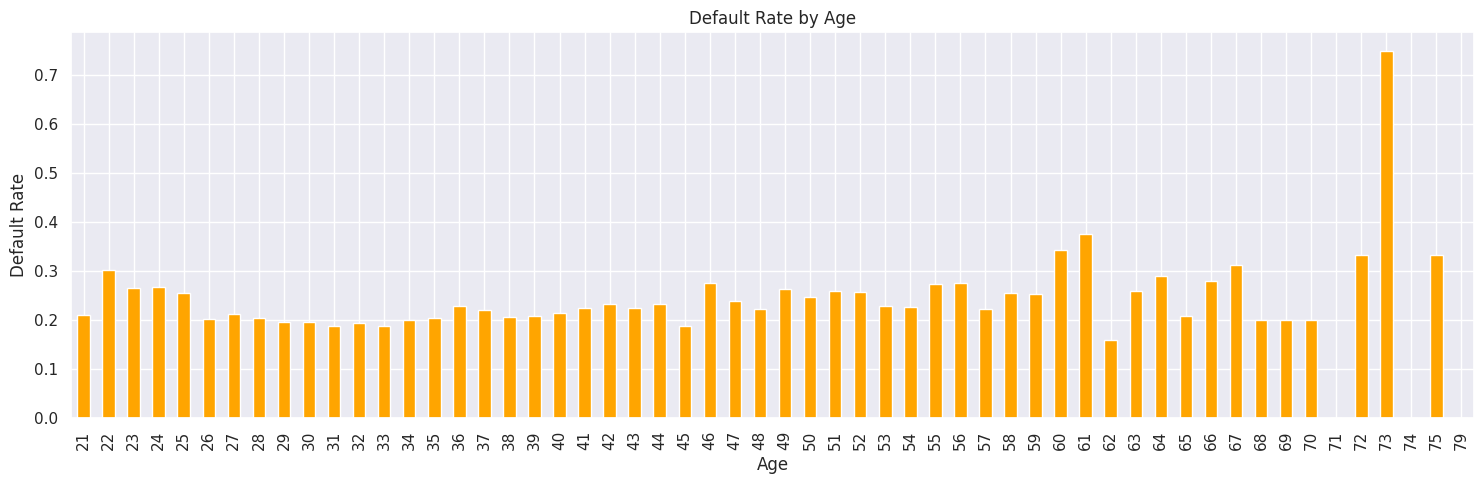

In [ ]:
# Create a default rate per age group
age_default_rate = df.groupby('AGE')['DEFAULT'].mean()

# Plot the default rate
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
age_default_rate.plot(kind='bar', color='orange')
plt.title("Default Rate by Age")
plt.ylabel("Default Rate")
plt.xlabel("Age")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: >

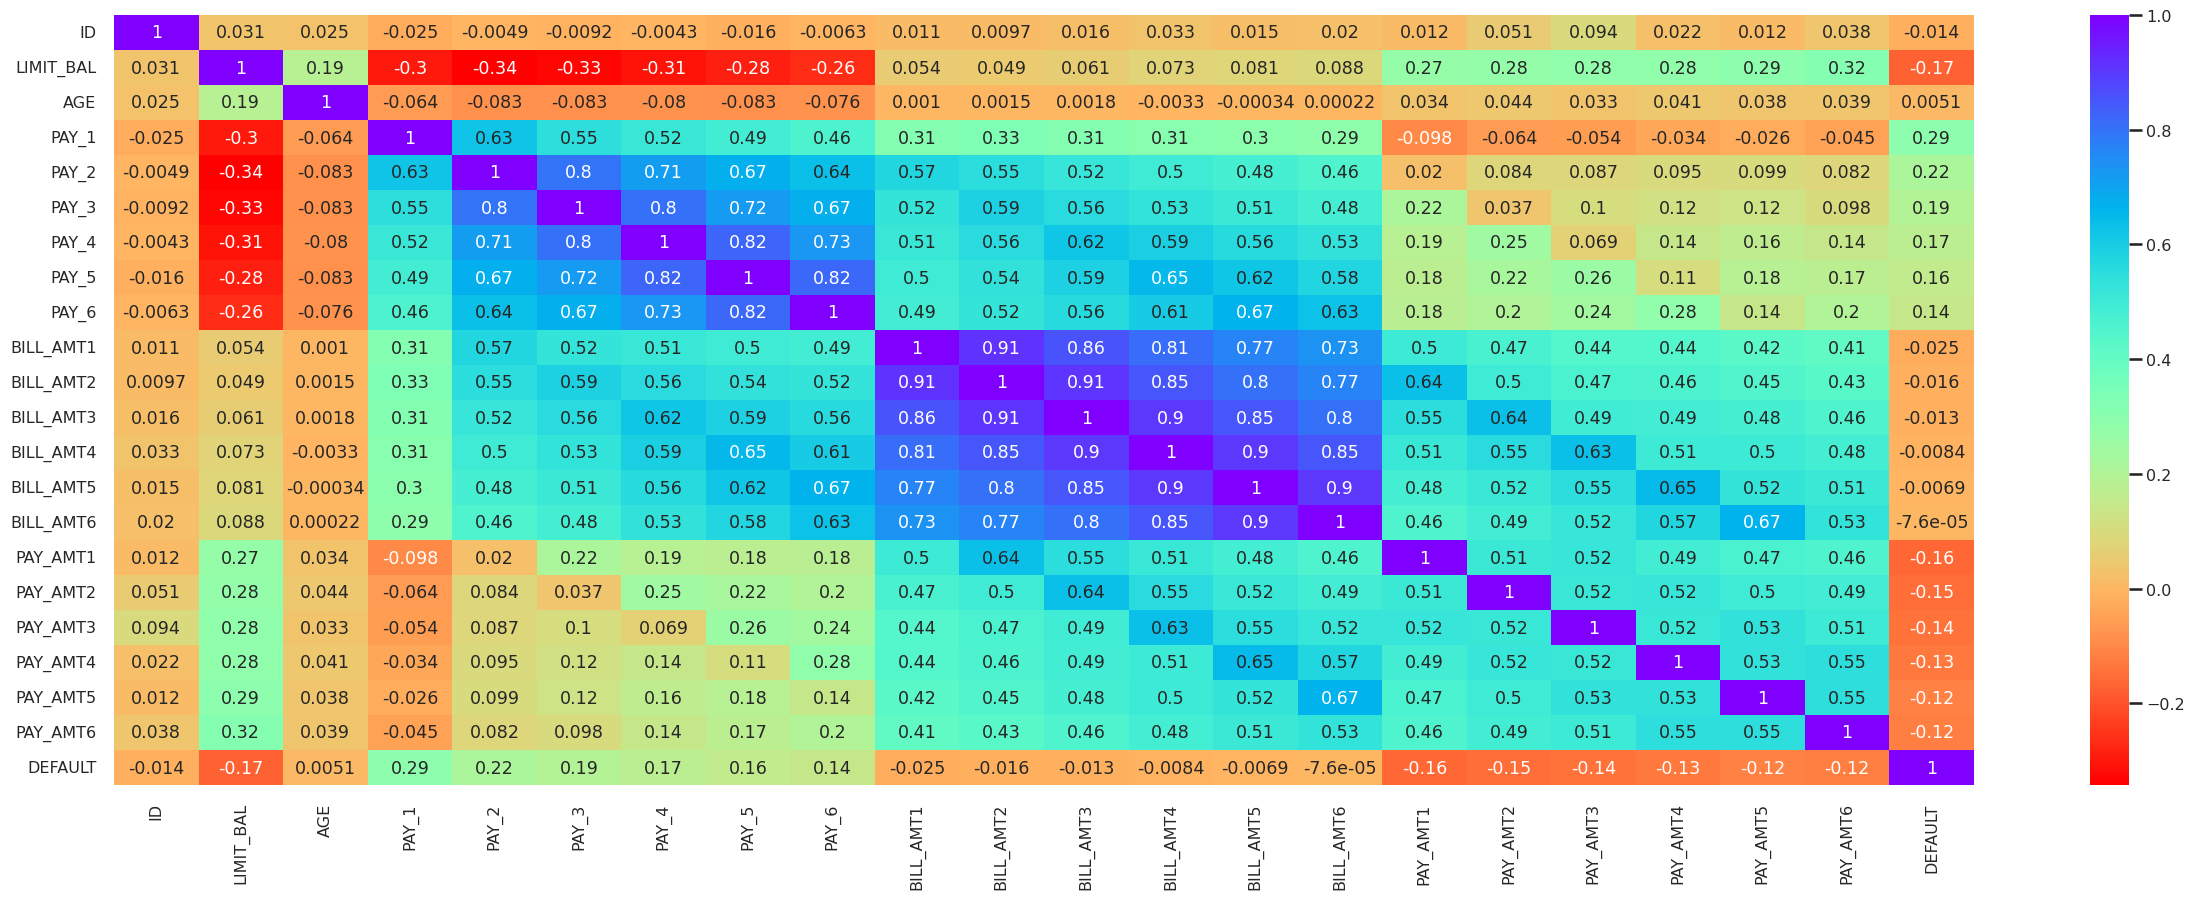

In [ ]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include='number')

# Set plot size and font scale
sns.set(rc={'figure.figsize': (30, 10)})
sns.set_context("talk", font_scale=0.7)

# Generate heatmap with Spearman correlation
sns.heatmap(numeric_df.corr(method='spearman'),
            cmap='rainbow_r', annot=True)


In [ ]:
# Filter numeric columns only
numeric_df = df.select_dtypes(include='number')

# Drop the DEFAULT column temporarily for comparison
correlations = numeric_df.drop("DEFAULT", axis=1)\
    .apply(lambda x: x.corr(numeric_df["DEFAULT"], method='spearman'))

# Display the correlations sorted by strongest relationship
print(correlations.sort_values(ascending=False))


PAY_1        0.292213
PAY_2        0.216919
PAY_3        0.194771
PAY_4        0.173690
PAY_5        0.159043
PAY_6        0.142523
AGE          0.005149
BILL_AMT6   -0.000076
BILL_AMT5   -0.006851
BILL_AMT4   -0.008357
BILL_AMT3   -0.012670
ID          -0.013952
BILL_AMT2   -0.015554
BILL_AMT1   -0.025327
PAY_AMT5    -0.116587
PAY_AMT6    -0.121444
PAY_AMT4    -0.127979
PAY_AMT3    -0.139388
PAY_AMT2    -0.150977
PAY_AMT1    -0.160493
LIMIT_BAL   -0.169586
dtype: float64


From the preceding output, we can easily conclude that the DEFAULT column has a
high positive correlation with PAY_1 (.29), which implies that if a customer has missed a payment in the first month, they have a higher chance of missing further payments in the consecutive months.

Also, the DEFAULT column has the highest negative correlation with PAY_AMT1
(-.16), which implies that the higher the payment for the month of September
2005, the lower the chances of default.

# Estimation Theory

* Estimate default rate (an estimator for the population default rate)

* Understand bias and variance

* Simulate sampling distribution of the estimator



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make sure DEFAULT is binary and numeric
df['DEFAULT'] = df['DEFAULT'].astype(int)

# --- STEP 2: Estimation Theory ---

# 1. Use sample mean as estimator for population default rate
default_rate_estimator = df['DEFAULT'].mean()
print(f"Estimated population default rate: {default_rate_estimator:.3f}")


Estimated population default rate: 0.221


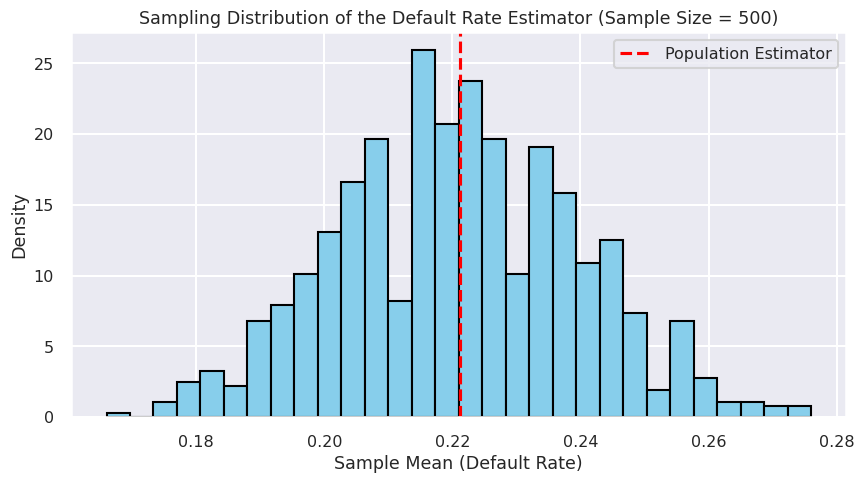

In [ ]:
# Simulate sampling distribution of the default rate estimator
sample_means = []

# Draw 1000 samples of size 500 each
for _ in range(1000):
    sample = df['DEFAULT'].sample(n=500, replace=True)
    sample_means.append(sample.mean())

# Convert to numpy array
sample_means = np.array(sample_means)

# Plot the sampling distribution
plt.figure(figsize=(10, 5))
plt.hist(sample_means, bins=30, edgecolor='black', color='skyblue', density=True)
plt.axvline(default_rate_estimator, color='red', linestyle='--', label='Population Estimator')
plt.title("Sampling Distribution of the Default Rate Estimator (Sample Size = 500)")
plt.xlabel("Sample Mean (Default Rate)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Mean and variance of sample means (sampling distribution)
mean_of_sample_means = np.mean(sample_means)
variance_of_sample_means = np.var(sample_means)

print(f"Mean of sample means (should ≈ population default rate): {mean_of_sample_means:.3f}")
print(f"Variance of sample means: {variance_of_sample_means:.6f}")


Mean of sample means (should ≈ population default rate): 0.221
Variance of sample means: 0.000350




> > "To estimate the population default rate, I used the mean of the `DEFAULT` column, which was **22.1%**.
> > But to understand how reliable this estimate is, I simulated taking 1,000 random samples of 500 customers each. I then calculated the average default rate in each of those samples and plotted the results as a histogram.
>
> The distribution of sample means was **centered around 22.2%**, with very small variance (**0.000349**), indicating that our estimator is both **accurate and consistent**.
>
> This exercise shows the **sampling distribution** of the default rate and helps us understand how much we can **trust our results** if we were to gather new data from a similar population."

---

## ✅ Final Takeaway:

* 📌 **Estimator** = sample default rate = 22.1%
* ✅ **Unbiased** = the mean of many samples is still \~22.2%
* ✅ **Low variance** = our estimator doesn’t jump around too much
* 📈 **Histogram** = shows how our estimate behaves across repeated samples

----

# Confidence Interval


### ✅ 🎯 Goal: Step 3 – Confidence Intervals

We will calculate **95% confidence intervals** for the default rate in different customer segments.

This answers the question:

> “What is the likely range of the true default rate in this group, based on our sample?”
---



In [ ]:
import statsmodels.api as sm

total_defaults = df['DEFAULT'].sum()
total_n = len(df)

ci_total = sm.stats.proportion_confint(total_defaults, total_n, alpha=0.05, method='normal')
print(f"95% Confidence Interval for default rate (all customers): {ci_total}")


95% Confidence Interval for default rate (all customers): (0.21650329809952445, 0.22589670190047556)


In [ ]:
male_defaults = df[df['SEX'] == 'Male']['DEFAULT']
female_defaults = df[df['SEX'] == 'Female']['DEFAULT']

ci_male = sm.stats.proportion_confint(male_defaults.sum(), len(male_defaults), alpha=0.05)
ci_female = sm.stats.proportion_confint(female_defaults.sum(), len(female_defaults), alpha=0.05)

print(f"95% CI for male default rate: {ci_male}")
print(f"95% CI for female default rate: {ci_female}")


95% CI for male default rate: (0.23397679702375163, 0.2493677521014166)
95% CI for female default rate: (0.20185432056295824, 0.21367129781160007)


In [ ]:
highschool_defaults = df[df['EDUCATION'] == 'High School']['DEFAULT']
ci_highschool = sm.stats.proportion_confint(highschool_defaults.sum(), len(highschool_defaults), alpha=0.05)

print(f"95% CI for High School educated customers: {ci_highschool}")


95% CI for High School educated customers: (0.2394476798217757, 0.26370464883390865)


In [ ]:
age22_defaults = df[df['AGE'] == 22]['DEFAULT']
ci_age22 = sm.stats.proportion_confint(age22_defaults.sum(), len(age22_defaults), alpha=0.05)

print(f"95% CI for age 22 default rate: {ci_age22}")


95% CI for age 22 default rate: (0.2637669688633761, 0.33980445970805245)


In [ ]:
def print_ci(label, group):
    defaults = group['DEFAULT']
    ci = sm.stats.proportion_confint(defaults.sum(), len(defaults), alpha=0.05)
    rate = defaults.mean()
    print(f"{label}: Default Rate = {rate:.3f}, 95% CI = ({ci[0]:.3f}, {ci[1]:.3f})")

print_ci("All Customers", df)
print_ci("Male Customers", df[df['SEX'] == 'Male'])
print_ci("Female Customers", df[df['SEX'] == 'Female'])
print_ci("High School Education", df[df['EDUCATION'] == 'High School'])
print_ci("Age 22", df[df['AGE'] == 22])


All Customers: Default Rate = 0.221, 95% CI = (0.217, 0.226)
Male Customers: Default Rate = 0.242, 95% CI = (0.234, 0.249)
Female Customers: Default Rate = 0.208, 95% CI = (0.202, 0.214)
High School Education: Default Rate = 0.252, 95% CI = (0.239, 0.264)
Age 22: Default Rate = 0.302, 95% CI = (0.264, 0.340)


---
> “After estimating the default rate for the entire dataset, I wanted to assess how **confident** we can be in the results for specific customer groups.
>
> To do that, I calculated **95% confidence intervals** for the default rates in several segments, including **male and female customers**, those with a **high school education**, and customers aged **22**.
>
> The confidence intervals tell us the **range** within which we expect the **true default rate** to fall for each group — not just what we observed in our sample.
>
> For example:
>
> * **Male customers** had a default rate of **24.2%**, and we’re 95% confident the true value lies between **23.4% and 24.9%**.
> * **22-year-olds**, although a smaller group, had a much higher estimated default rate of **30.2%**, but with a wider interval (**26.4% to 34.0%**) due to higher uncertainty.
>

---


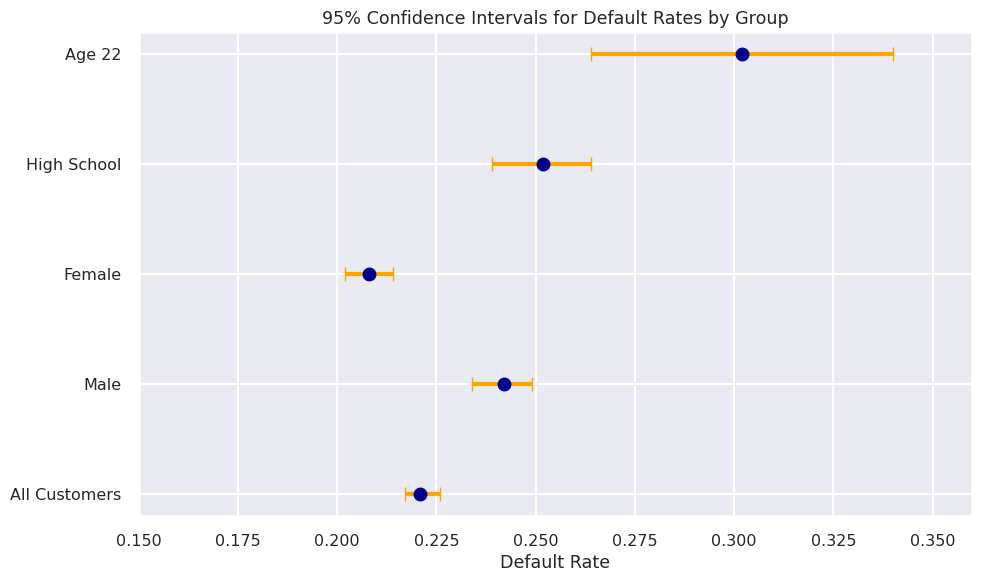

In [ ]:
import matplotlib.pyplot as plt

# Labels and data
groups = ['All Customers', 'Male', 'Female', 'High School', 'Age 22']
default_rates = [0.221, 0.242, 0.208, 0.252, 0.302]
ci_lowers = [0.217, 0.234, 0.202, 0.239, 0.264]
ci_uppers = [0.226, 0.249, 0.214, 0.264, 0.340]

# Calculate error margins
lower_errors = [r - l for r, l in zip(default_rates, ci_lowers)]
upper_errors = [u - r for u, r in zip(ci_uppers, default_rates)]

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(default_rates, groups,
             xerr=[lower_errors, upper_errors],
             fmt='o', color='darkblue', ecolor='orange', elinewidth=3, capsize=5)

plt.title('95% Confidence Intervals for Default Rates by Group')
plt.xlabel('Default Rate')
plt.grid(True)
plt.xlim(0.15, 0.36)
plt.tight_layout()
plt.show()


### Hypothesis Testing / A/B Testing
---


We’ll test whether differences in default rates between **two groups** are **statistically significant**, using a **Z-test for proportions**.

### we are seeking to answer questions like:

* Is the **default rate** significantly higher for **males vs females**?
* Are **high school educated customers** riskier than **university graduates**?
* Are **22-year-olds** significantly more likely to default than others?

---


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Get values
male = df[df['SEX'] == 'Male']['DEFAULT']
female = df[df['SEX'] == 'Female']['DEFAULT']

count = [male.sum(), female.sum()]        # number of defaulters
nobs = [len(male), len(female)]           # total number in each group

# Run two-proportion Z-test
z_stat, p_value = proportions_ztest(count, nobs)
print(f"Z-statistic: {z_stat:.3f}")
print(f"p-value: {p_value:.4f}")


Z-statistic: 6.921
p-value: 0.0000


In [ ]:
hs = df[df['EDUCATION'] == 'High School']['DEFAULT']
univ = df[df['EDUCATION'] == 'University']['DEFAULT']

count = [hs.sum(), univ.sum()]
nobs = [len(hs), len(univ)]

z_stat, p_value = proportions_ztest(count, nobs)
print(f"High School vs University -> Z: {z_stat:.3f}, p-value: {p_value:.4f}")


High School vs University -> Z: 2.007, p-value: 0.0447


In [ ]:
age_27 = df[df['AGE'] == 27]['DEFAULT']
others = df[df['AGE'] != 27]['DEFAULT']

count = [age_27.sum(), others.sum()]
nobs = [len(age_27), len(others)]

z_stat, p_value = proportions_ztest(count, nobs)
print(f"Age 27 vs Others -> Z: {z_stat:.3f}, p-value: {p_value:.4f}")


Age 27 vs Others -> Z: -0.882, p-value: 0.3780


In [ ]:
age_29 = df[df['AGE'] == 29]['DEFAULT']
others = df[df['AGE'] != 29]['DEFAULT']

count = [age_29.sum(), others.sum()]
nobs = [len(age_29), len(others)]

z_stat, p_value = proportions_ztest(count, nobs)
print(f"Age 29 vs Others -> Z: {z_stat:.3f}, p-value: {p_value:.4f}")


Age 29 vs Others -> Z: -2.598, p-value: 0.0094


In [ ]:
age_22 = df[df['AGE'] == 22]['DEFAULT']
others = df[df['AGE'] != 22]['DEFAULT']

count = [age_22.sum(), others.sum()]
nobs = [len(age_22), len(others)]

z_stat, p_value = proportions_ztest(count, nobs)
print(f"Age 22 vs Others -> Z: {z_stat:.3f}, p-value: {p_value:.4f}")


Age 22 vs Others -> Z: 4.638, p-value: 0.0000


> > “Here we conducted formal hypothesis testing using the **Z-test for proportions** to determine whether the differences in default rates between certain groups were **statistically significant**.
>
> * For example, the **difference between male and female customers** was extremely significant (**p < 0.0001**), confirming that males are **more likely to default**.
> * Similarly, customers with a **high school education** were statistically more likely to default than university graduates (**p ≈ 0.045**), supporting our earlier EDA findings.
> * Most notably, **22-year-olds** had the highest observed default rate, and hypothesis testing confirmed this group is significantly more risky than other ages (**p < 0.0001**).
>
> Interestingly, even though age 27 and 29 had high default counts, hypothesis testing showed that these ages are **not significantly more risky** — the default counts were high simply because there were **more people** in those age groups.
>
> This shows the importance of going beyond visual analysis and performing statistical tests to **validate our insights**.”

---


# Regression Analysis

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Copy dataframe and encode categorical variables
df_model = df.copy()

# Encode categorical features
df_model['SEX'] = df_model['SEX'].map({'Male': 1, 'Female': 0})
df_model = pd.get_dummies(df_model, columns=['EDUCATION', 'MARRIAGE'], drop_first=True)

# Select features based on correlation analysis
features = [
    'LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'SEX',  # encoded
    'EDUCATION_High School', 'EDUCATION_University',
    'MARRIAGE_Single', 'MARRIAGE_Single'
]



In [ ]:
df_model

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single
0,1,20000,0,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,False,False,True,True,False
1,2,120000,0,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,False,False,True,False,True
2,3,90000,0,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,False,False,True,False,True
3,4,50000,0,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,False,False,True,True,False
4,5,50000,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,39,0,0,0,0,0,0,...,5003,3047,5000,1000,0,True,False,False,True,False
29996,29997,150000,1,43,-1,-1,-1,-1,0,0,...,8998,129,0,0,0,True,False,False,False,True
29997,29998,30000,1,37,4,3,2,-1,0,0,...,22000,4200,2000,3100,1,False,False,True,False,True
29998,29999,80000,1,41,1,-1,0,0,0,-1,...,1178,1926,52964,1804,1,True,False,False,True,False


In [ ]:
print(df_model.columns[df_model.columns.str.startswith('MARRIAGE')])
print(df_model.columns[df_model.columns.str.startswith('EDUCATION')])


Index(['MARRIAGE_Married', 'MARRIAGE_Single'], dtype='object')
Index(['EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_University'], dtype='object')


In [ ]:

X = df_model[features]
y = df_model['DEFAULT']

In [ ]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.69      0.23      0.34      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000


Confusion Matrix:
[[6836  204]
 [1511  449]]


In [ ]:
# Match feature names to coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)


                  Feature  Coefficient
1                   PAY_1     0.648014
8                PAY_AMT2    -0.316791
7                PAY_AMT1    -0.176500
0               LIMIT_BAL    -0.151927
3                   PAY_3     0.092571
9                PAY_AMT3    -0.084178
2                   PAY_2     0.076925
10                    SEX     0.059556
14        MARRIAGE_Single    -0.057738
13        MARRIAGE_Single    -0.057738
4                   PAY_4     0.035632
12   EDUCATION_University    -0.025121
11  EDUCATION_High School    -0.023980
6                   PAY_6     0.021683
5                   PAY_5     0.020737



---

### What does this mean?

>  The model is **very good at identifying non-defaulters**,
>  But it's **missing a lot of actual defaulters** — it only catches 23% of them!

This is a **class imbalance issue**: the model is biased toward predicting class `0` (non-default) because it’s more common.

---



> "The logistic regression model performs **very well at identifying non-defaulters** (accuracy: 97%),
> but struggles to **correctly identify defaulters**, with only 23% recall.
> This is a common issue in **imbalanced classification problems**, where one class (non-default) dominates the dataset."

---


In [ ]:
pip install imblearn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE only on training data (never on test!)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts().to_dict())


Before SMOTE: {0: 16324, 1: 4676}
After SMOTE: {1: 16324, 0: 16324}


In [ ]:
# Retrain model on balanced data
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_resampled, y_train_resampled)

# Predict on original test data
y_pred_smote = model_smote.predict(X_test_scaled)


In [ ]:
# Show classification report and confusion matrix
print("Classification Report (After SMOTE):")
print(classification_report(y_test, y_pred_smote))

print("Confusion Matrix (After SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))


Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      7040
           1       0.37      0.67      0.47      1960

    accuracy                           0.68      9000
   macro avg       0.62      0.67      0.62      9000
weighted avg       0.77      0.68      0.70      9000

Confusion Matrix (After SMOTE):
[[4787 2253]
 [ 652 1308]]


## Comments on results

> > “After applying SMOTE to balance the training data, the logistic regression model's ability to detect defaulters **improved dramatically**, increasing recall from **23% to 67%**.
>
> Although overall accuracy decreased (from 81% to 68%), the model is now much better at **identifying high-risk customers**, which aligns with our project goal.
>
> This is a common and acceptable trade-off in credit risk analysis — it’s often better to **flag more potential defaulters**, even at the cost of a few false positives.”





> * “We didn’t use **Least Squares** because logistic regression is more appropriate for binary outcomes and is based on **Maximum Likelihood Estimation**, not LS.”
> * “We didn’t use **ANOVA** because our target variable was binary. Instead, we used **Z-tests** to compare group proportions, which is more statistically appropriate.”

